# Алгоритм Байєса

In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [2]:
raw_data = pd.read_csv('Phishing_paper1.csv')
to_remove = np.random.choice(raw_data[raw_data['Status']==0].index,size=509050,replace=False)
mindata = raw_data.drop(to_remove)


In [3]:
scaler1 = MinMaxScaler()
scaler1.fit(mindata.drop('Status', axis=1))
scaled_features1 = scaler1.transform(mindata.drop('Status', axis=1))
scaled_data1 = pd.DataFrame(scaled_features1, columns = mindata.drop('Status', axis=1).columns)
print(scaled_data1)

       Total Number of Characters C  Vocabulary richness W/C   Account  \
0                          0.000981                 0.620822  0.068966   
1                          0.002648                 0.670521  0.000000   
2                          0.004049                 0.445654  0.000000   
3                          0.000889                 0.517628  0.000000   
4                          0.001105                 0.610139  0.241379   
...                             ...                      ...       ...   
16699                      0.000963                 0.764604  0.000000   
16700                      0.000784                 0.670593  0.000000   
16701                      0.001825                 0.863866  0.000000   
16702                      0.000455                 0.582327  0.000000   
16703                      0.000510                 0.586672  0.000000   

       Access  Bank  Credit     Click  Identity  Inconvenience  Information  \
0      0.0000   0.0   0.000  0.0

In [4]:
features = scaled_data1
labels = mindata['Status']
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size= .33, random_state = 14)
mlnNB = MultinomialNB() 
mlnNB.fit(features_train, labels_train)
pred_on_test_data = mlnNB.predict(features_test)
predictions = mlnNB.predict(features_test)
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      2763
           1       0.93      0.67      0.78      2750

    accuracy                           0.81      5513
   macro avg       0.84      0.81      0.81      5513
weighted avg       0.84      0.81      0.81      5513



# Метод knn

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [6]:
print(mindata.Status.value_counts())

0    8352
1    8352
Name: Status, dtype: int64


In [7]:
scaler = StandardScaler()
scaler.fit(mindata.drop('Status', axis=1))
scaled_features = scaler.transform(mindata.drop('Status', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = mindata.drop('Status', axis=1).columns)

In [8]:
x = scaled_data
y = mindata['Status']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2488
           1       0.92      0.92      0.92      2524

    accuracy                           0.92      5012
   macro avg       0.92      0.92      0.92      5012
weighted avg       0.92      0.92      0.92      5012



# Лінійна/логістична регресія

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
Linregressor = LinearRegression()
Linregressor.fit(X_train, y_train)
Logregressor = LogisticRegression(max_iter=1000)
Logregressor.fit(X_train, y_train)
Lin_pred = Linregressor.predict(X_test)
Log_pred = Logregressor.predict(X_test)
print("LinearRegression metrics")
print('MAE:', metrics.mean_absolute_error(y_test, Lin_pred))
print('MSE:', metrics.mean_squared_error(y_test, Lin_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Lin_pred)))
print("--------------------------------------")
print("LogisticRegression metrics")
print('MAE:', (metrics.mean_absolute_error(y_test, Log_pred)))
print('MSE:', metrics.mean_squared_error(y_test, Log_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Log_pred)))
print("--------------------------------------")

LinearRegression metrics
MAE: 0.3248038639794675
MSE: 0.1481254971215894
RMSE: 0.3848707537883197
--------------------------------------
LogisticRegression metrics
MAE: 0.15782122905027932
MSE: 0.15782122905027932
RMSE: 0.39726720107539626
--------------------------------------


# Метод опорних векторів

In [11]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y,train_size = 0.1, random_state = 1)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
svc = SVC(C=1.0, random_state=1, kernel='linear')
svc.fit(X_train_std, y_train)
y_predict = svc.predict(X_test_std)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7487
           1       0.94      0.76      0.84      7547

    accuracy                           0.86     15034
   macro avg       0.87      0.86      0.86     15034
weighted avg       0.87      0.86      0.86     15034



# С4.5 та CART

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from c45 import C45
from sklearn import tree

In [14]:
CART = DecisionTreeClassifier()
CART = CART.fit(X_train,y_train)
CART_pred = CART.predict(X_test)
print("CART result")
print("-----------------------------------------------------")
print(classification_report(y_test, CART_pred))
print("-----------------------------------------------------")
print("CART Actual vs Predicted")
print("-----------------------------------------------------")
print(pd.DataFrame({'Actual': y_test, 'Predicted': CART_pred}))
print("-----------------------------------------------------")

CART result
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      7487
           1       0.91      0.90      0.91      7547

    accuracy                           0.91     15034
   macro avg       0.91      0.91      0.91     15034
weighted avg       0.91      0.91      0.91     15034

-----------------------------------------------------
CART Actual vs Predicted
-----------------------------------------------------
        Actual  Predicted
22           1          0
209629       0          0
2262         1          1
5821         1          1
2061         1          1
...        ...        ...
361472       0          0
2047         1          1
92910        0          0
6966         1          1
6342         1          1

[15034 rows x 2 columns]
-----------------------------------------------------


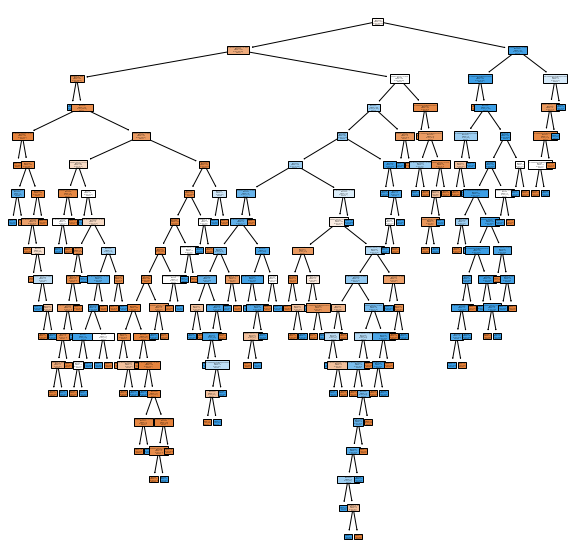

In [15]:
plt.figure(figsize = (10, 10))
tree.plot_tree(CART, feature_names = X_train.columns, class_names= ['1', '0'], filled = True)
plt.show()

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from c45 import C45
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier


In [17]:
clf = C45(None)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
c = clf.fit(X_train, y_train)
c45_pred = c.predict(X_test)
print("-----------------------------------------------------")
print("C4.5 result")
print("-----------------------------------------------------")
print(classification_report(y_test, c45_pred))

-----------------------------------------------------
C4.5 result
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2087
           1       0.91      0.92      0.92      2089

    accuracy                           0.92      4176
   macro avg       0.92      0.92      0.92      4176
weighted avg       0.92      0.92      0.92      4176



# Метод DBSCAN і A/B тестування

In [18]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

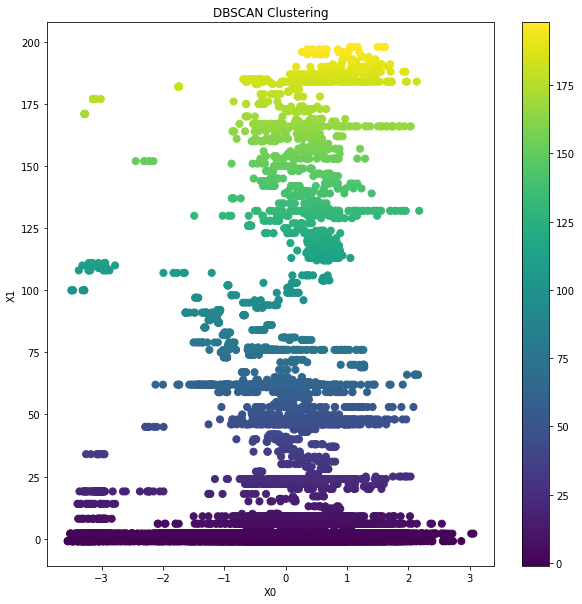

In [19]:
X = scaled_data
data = pd.DataFrame(X)
std_slc = StandardScaler()
X_std = std_slc.fit_transform(X)
clt = DBSCAN()
model = clt.fit(X_std)
clusters = pd.DataFrame(model.fit_predict(X_std))
data["Cluster"] = clusters
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(data.iloc[:,1],data.iloc[:,21], c=data["Cluster"],s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()


In [20]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [21]:
effect_size = sms.proportion_effectsize(0.13, 0.15)
required_n = sms.NormalIndPower().solve_power(effect_size, power=0.8, alpha=0.05, ratio=1)                                                  
required_n = ceil(required_n)
print(required_n)

4720


In [22]:
raw_data1 = pd.read_csv('ab_data.csv')
session_counts = raw_data1['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()
users_to_drop = session_counts[session_counts > 1].index
raw_data1 = raw_data1[~raw_data1['user_id'].isin(users_to_drop)]

In [23]:
control_sample = raw_data1[raw_data1['group'] == 'control'].sample(n=required_n, random_state=22)
treatment_sample = raw_data1[raw_data1['group'] == 'treatment'].sample(n=required_n, random_state=22)
ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)
print(ab_test)

      user_id                   timestamp      group landing_page  converted
0      763854  2017-01-21 03:43:17.188315    control     old_page          0
1      690555  2017-01-18 06:38:13.079449    control     old_page          0
2      861520  2017-01-06 21:13:40.044766    control     old_page          0
3      630778  2017-01-05 16:42:36.995204    control     old_page          0
4      656634  2017-01-04 15:31:21.676130    control     old_page          0
...       ...                         ...        ...          ...        ...
9435   908512  2017-01-14 22:02:29.922674  treatment     new_page          0
9436   873211  2017-01-05 00:57:16.167151  treatment     new_page          0
9437   631276  2017-01-20 18:56:58.167809  treatment     new_page          0
9438   662301  2017-01-03 08:10:57.768806  treatment     new_page          0
9439   944623  2017-01-19 10:56:01.648653  treatment     new_page          1

[9440 rows x 5 columns]


           conversion_rate  deviation     error
group                                          
control           0.123305   0.328787  0.004786
treatment         0.125636   0.331438  0.004824


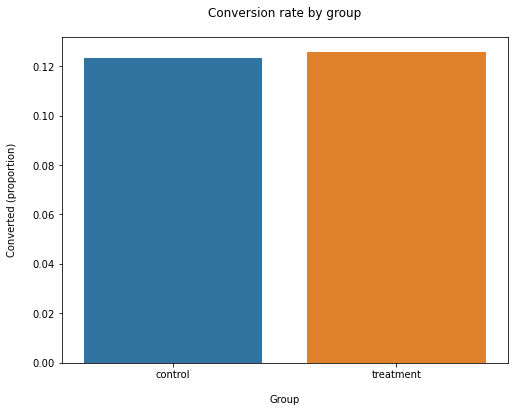

In [24]:
conversion_rates = ab_test.groupby('group')['converted']
a = lambda x: np.std(x, ddof=0)
b = lambda x: stats.sem(x, ddof=0)            
conversion_rates = conversion_rates.agg([np.mean, a, b])
conversion_rates.columns = ['conversion_rate', 'deviation', 'error']
print(conversion_rates)
plt.figure(figsize=(8,6))
sns.barplot(x=ab_test['group'], y=ab_test['converted'], ci=False)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15)
plt.show()

# Ієрархічна кластеризація

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA

In [26]:
normalized_data = normalize(scaled_data)
normalized_data = pd.DataFrame(normalized_data)

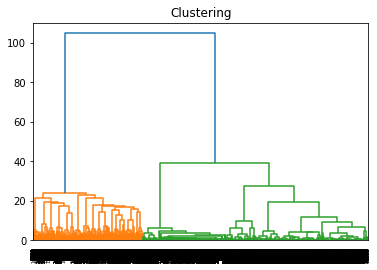

In [27]:
plt.title('Clustering') 
Dendrogram = shc.dendrogram((shc.linkage(normalized_data, method ='ward')))
plt.show()

# Аналіз головних компонент

In [28]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [29]:
columns = raw_data.columns
x = raw_data.loc[:, columns].values
y = raw_data.loc[:,['Status']].values

In [30]:
x_std = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca_raw_data = pd.DataFrame(data = principalComponents, columns = ['PCA 1', 'PCA 2'])
final_pca_raw_data = pd.concat([pca_raw_data, raw_data[['Status']]], axis = 1)
print(final_pca_raw_data)

              PCA 1       PCA 2  Status
0       -603.811792    8.891004       1
1       2191.831600 -139.703884       1
2       4538.390681  -45.465404       1
3       -759.395508   35.701182       1
4       -395.773418    9.158540       1
...             ...         ...     ...
525749 -1508.915479   53.306963       0
525750 -1696.163661   63.461503       0
525751 -1529.972688   55.874802       0
525752 -1665.026375   57.100028       0
525753   807.863014  -58.112507       0

[525754 rows x 3 columns]


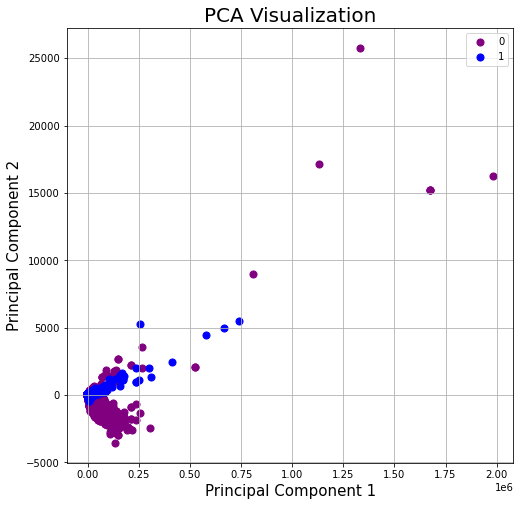

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA Visualization', fontsize = 20)
targets = [0,1]
colors = ['purple', 'blue']
for target, color in zip(targets,colors):
    indicesToKeep = final_pca_raw_data['Status'] == target
    ax.scatter(final_pca_raw_data.loc[indicesToKeep, 'PCA 1'], final_pca_raw_data.loc[indicesToKeep, 'PCA 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()
plt.show()